In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



In [108]:
# Wrote SQL query to get a feature table of pdouct categories and its corresponding data
# uploading the csv file
df = pd.read_csv("C:/Users/gadda/Downloads/product_segmentation_Olist.csv")
df

,product_id,category_name,total_items_sold,total_orders,total_revenue,aov,avg_review_score,low_review_perc,avg_delivery_time,avg_delivery_delay,avg_product_price,avg_freight_ratio,avg_lead_time
0,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,1054,431,89641.52,207.98,4.02,14.12,11.37,-9.12,71.36,0.19,6.31
1,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,982,467,102783.70,220.09,3.90,16.60,13.05,-9.36,88.17,0.19,5.90
2,422879e10f46682990de24d770e7f83d,ferramentas_jardim,974,352,68845.40,195.58,3.95,19.55,15.43,-9.65,54.90,0.29,5.90
3,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,784,311,57365.36,184.45,4.12,15.60,15.26,-9.09,54.70,0.34,5.70
4,368c6c730842d78016ad823897a372db,ferramentas_jardim,782,291,56410.38,193.85,3.92,19.33,14.97,-10.19,54.30,0.33,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,a2f108447e5847c9edd533c37908bf01,construcao_ferramentas_iluminacao,2,1,115.54,115.54,4.00,0.00,4.00,0.00,50.00,0.16,5.00
32947,a2f25a7e9c4eea1e3c2949d03c688048,agro_industria_e_comercio,2,1,547.26,547.26,4.00,0.00,11.00,-10.00,258.80,0.06,6.00
32948,a2f28e3d47bd6d7d334089ebebdd55e2,pet_shop,2,1,1071.88,1071.88,5.00,0.00,11.00,-23.00,499.99,0.07,4.00
32949,a2f3be463c1d322c27cbe55cf03e5fda,perfumaria,2,1,858.82,858.82,5.00,0.00,16.00,-8.00,415.00,0.03,11.00


In [109]:
df.dtypes

product_id             object
category_name          object
total_items_sold        int64
total_orders            int64
total_revenue         float64
aov                   float64
avg_review_score      float64
low_review_perc       float64
avg_delivery_time     float64
avg_delivery_delay    float64
avg_product_price     float64
avg_freight_ratio     float64
avg_lead_time         float64
dtype: object

In [110]:
# checking for nulls and cleaning data as needed
df.describe()
# can see that some features need to be scaled like total_revenue 

,total_items_sold,total_orders,total_revenue,aov,avg_review_score,low_review_perc,avg_delivery_time,avg_delivery_delay,avg_product_price,avg_freight_ratio,avg_lead_time
count,32951.000000,32951.000000,32951.000000,32951.000000,32789.000000,32789.000000,32214.000000,32214.000000,32951.000000,32951.000000,32951.000000
mean,6.877728,3.108403,966.032735,357.928192,4.047853,16.050806,11.700568,-11.387625,145.303282,0.320338,6.502650
std,21.373370,9.456937,3102.190354,559.917653,1.213930,32.017063,8.419553,9.267512,246.895886,0.354563,8.305588
min,2.000000,1.000000,19.180000,19.180000,1.000000,0.000000,1.000000,-139.000000,0.850000,0.000000,2.000000
25%,2.000000,1.000000,165.680000,119.900000,3.610000,0.000000,7.000000,-15.670000,39.900000,0.130000,5.000000
50%,2.000000,1.000000,338.400000,209.760000,4.500000,0.000000,10.000000,-11.330000,79.000000,0.230000,6.000000
75%,6.000000,2.000000,784.590000,379.690000,5.000000,13.790000,14.400000,-7.000000,154.900000,0.400000,7.000000
max,1054.000000,467.000000,135889.740000,27328.160000,5.000000,100.000000,195.000000,167.000000,6735.000000,23.040000,1056.000000


In [111]:
# removing data with very few orders (<10)
df = df[df['total_orders'] >= 10]
df

,product_id,category_name,total_items_sold,total_orders,total_revenue,aov,avg_review_score,low_review_perc,avg_delivery_time,avg_delivery_delay,avg_product_price,avg_freight_ratio,avg_lead_time
0,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,1054,431,89641.52,207.98,4.02,14.12,11.37,-9.12,71.36,0.19,6.31
1,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,982,467,102783.70,220.09,3.90,16.60,13.05,-9.36,88.17,0.19,5.90
2,422879e10f46682990de24d770e7f83d,ferramentas_jardim,974,352,68845.40,195.58,3.95,19.55,15.43,-9.65,54.90,0.29,5.90
3,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,784,311,57365.36,184.45,4.12,15.60,15.26,-9.09,54.70,0.34,5.70
4,368c6c730842d78016ad823897a372db,ferramentas_jardim,782,291,56410.38,193.85,3.92,19.33,14.97,-10.19,54.30,0.33,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bolsas_e_acessorios,20,10,392.40,39.24,5.00,0.00,9.90,-15.90,10.90,0.80,4.00
1921,e85cdca8790ea0026ddf7316f469608a,moveis_sala,20,10,1450.82,145.08,3.80,20.00,16.70,-23.50,56.19,0.29,26.00
1922,d245838e3d0b2b51d751ccdc98885a8e,beleza_saude,20,10,319.20,31.92,3.40,20.00,6.63,-11.75,6.00,1.66,8.40
1925,d37abf50cce5bcd682830a357783622e,papelaria,20,10,2331.38,233.14,4.80,0.00,12.60,-10.20,97.90,0.19,5.70


In [112]:
df.isnull().sum()

product_id             0
category_name         17
total_items_sold       0
total_orders           0
total_revenue          0
aov                    0
avg_review_score       0
low_review_perc        0
avg_delivery_time      0
avg_delivery_delay     0
avg_product_price      0
avg_freight_ratio      0
avg_lead_time          0
dtype: int64

In [113]:
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\3641017954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


product_id            0
category_name         0
total_items_sold      0
total_orders          0
total_revenue         0
aov                   0
avg_review_score      0
low_review_perc       0
avg_delivery_time     0
avg_delivery_delay    0
avg_product_price     0
avg_freight_ratio     0
avg_lead_time         0
dtype: int64

In [114]:
## Preparing data for clustering --> only want numeric data 
df.drop(['product_id','category_name'], axis=1, inplace=True)
df

C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\613299352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['product_id','category_name'], axis=1, inplace=True)


,total_items_sold,total_orders,total_revenue,aov,avg_review_score,low_review_perc,avg_delivery_time,avg_delivery_delay,avg_product_price,avg_freight_ratio,avg_lead_time
0,1054,431,89641.52,207.98,4.02,14.12,11.37,-9.12,71.36,0.19,6.31
1,982,467,102783.70,220.09,3.90,16.60,13.05,-9.36,88.17,0.19,5.90
2,974,352,68845.40,195.58,3.95,19.55,15.43,-9.65,54.90,0.29,5.90
3,784,311,57365.36,184.45,4.12,15.60,15.26,-9.09,54.70,0.34,5.70
4,782,291,56410.38,193.85,3.92,19.33,14.97,-10.19,54.30,0.33,5.80
...,...,...,...,...,...,...,...,...,...,...,...
1918,20,10,392.40,39.24,5.00,0.00,9.90,-15.90,10.90,0.80,4.00
1921,20,10,1450.82,145.08,3.80,20.00,16.70,-23.50,56.19,0.29,26.00
1922,20,10,319.20,31.92,3.40,20.00,6.63,-11.75,6.00,1.66,8.40
1925,20,10,2331.38,233.14,4.80,0.00,12.60,-10.20,97.90,0.19,5.70


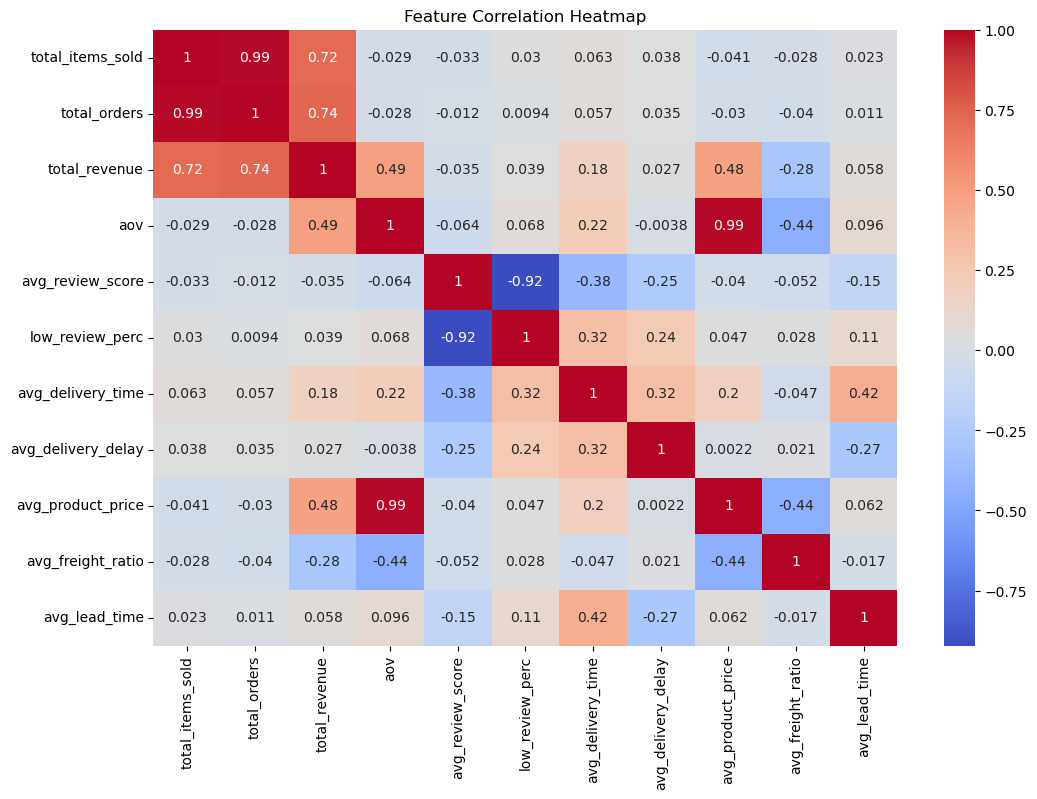

In [115]:
# checking correlations to see if I can drop any redundant features
# highly correlated features can distort the distance caculation in kmeans
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


* Total orders, total items sold, and total revenue are highly correlated
* aov highly correlated with avg_product_price
* avg review score highly correlated with low_review_perc
* Avg delivery time more interpretable than delay 

we can drop total orders, total items sold, avg_product_price, and low_review_perc


In [116]:
df.drop(['total_items_sold', 'total_orders','low_review_perc', 'avg_product_price'
                                  ], axis=1, inplace=True)
df.head()

C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\772481584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['total_items_sold', 'total_orders','low_review_perc', 'avg_product_price'


,total_revenue,aov,avg_review_score,avg_delivery_time,avg_delivery_delay,avg_freight_ratio,avg_lead_time
0,89641.52,207.98,4.02,11.37,-9.12,0.19,6.31
1,102783.70,220.09,3.90,13.05,-9.36,0.19,5.90
2,68845.40,195.58,3.95,15.43,-9.65,0.29,5.90
3,57365.36,184.45,4.12,15.26,-9.09,0.34,5.70
4,56410.38,193.85,3.92,14.97,-10.19,0.33,5.80


# Feature Engineering for Dimensionality Reduction

* Profit Index: rewards high revenue and low shipping cost share
* Customer Satisfaction Index: Based on average review scores
* Shipping Efficiency: Delivery time + lead time


In [117]:
df["profit_index"] = df["total_revenue"] / (df["avg_freight_ratio"] + 1)
df["customer_satisfaction"] = df["avg_review_score"]
df["shipping_efficiency"] = 1 / (df["avg_delivery_time"] + df["avg_lead_time"])
df.head()


C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\4042377930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["profit_index"] = df["total_revenue"] / (df["avg_freight_ratio"] + 1)
C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\4042377930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_satisfaction"] = df["avg_review_score"]
C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\4042377930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,total_revenue,aov,avg_review_score,avg_delivery_time,avg_delivery_delay,avg_freight_ratio,avg_lead_time,profit_index,customer_satisfaction,shipping_efficiency
0,89641.52,207.98,4.02,11.37,-9.12,0.19,6.31,75329.008403,4.02,0.056561
1,102783.70,220.09,3.90,13.05,-9.36,0.19,5.90,86372.857143,3.90,0.052770
2,68845.40,195.58,3.95,15.43,-9.65,0.29,5.90,53368.527132,3.95,0.046882
3,57365.36,184.45,4.12,15.26,-9.09,0.34,5.70,42809.970149,4.12,0.047710
4,56410.38,193.85,3.92,14.97,-10.19,0.33,5.80,42413.819549,3.92,0.048146


In [118]:
df.drop(['total_revenue','avg_review_score','avg_delivery_time','avg_freight_ratio',
               'avg_lead_time', 'aov', 'avg_delivery_delay'], axis=1, inplace=True)
df

C:\Users\gadda\AppData\Local\Temp\ipykernel_17592\2068334166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['total_revenue','avg_review_score','avg_delivery_time','avg_freight_ratio',


,profit_index,customer_satisfaction,shipping_efficiency
0,75329.008403,4.02,0.056561
1,86372.857143,3.90,0.052770
2,53368.527132,3.95,0.046882
3,42809.970149,4.12,0.047710
4,42413.819549,3.92,0.048146
...,...,...,...
1918,218.000000,5.00,0.071942
1921,1124.666667,3.80,0.023419
1922,120.000000,3.40,0.066534
1925,1959.142857,4.80,0.054645


Text(0, 0.5, 'count')

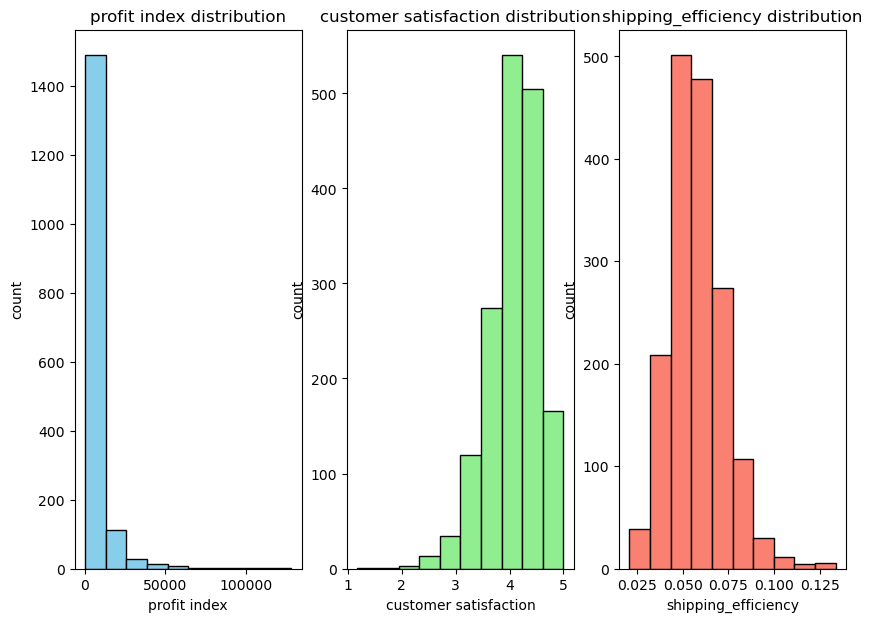

In [119]:
# checking for outliers
plt.figure(figsize=(24,7))
plt.subplot(1,7,1)
plt.hist(df['profit_index'], color = 'skyblue', edgecolor='black')
plt.title('profit index distribution')
plt.xlabel('profit index')
plt.ylabel('count')

plt.subplot(1,7,2)
plt.hist(df['customer_satisfaction'], color = 'lightgreen', edgecolor='black')
plt.title('customer satisfaction distribution')
plt.xlabel('customer satisfaction')
plt.ylabel('count')

plt.subplot(1,7,3)
plt.hist(df['shipping_efficiency'], color = 'salmon', edgecolor='black')
plt.title('shipping_efficiency distribution')
plt.xlabel('shipping_efficiency')
plt.ylabel('count')



All graphs appear to be skewed. We can perform a log transformation to account for this. 
Can't do log transformation on customer satifaction and efficiency because it's on a narrow scale already.
We can try power transformation

Text(0, 0.5, 'count')

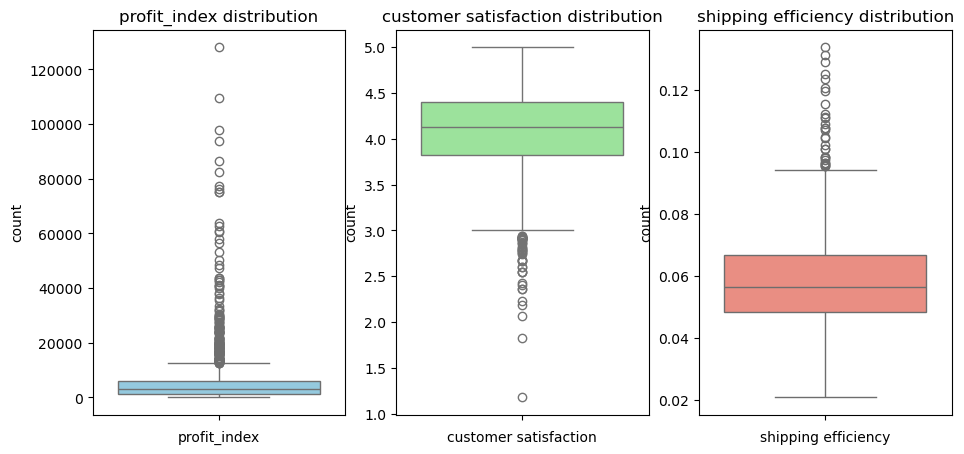

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(df['profit_index'], color = 'skyblue')
plt.title('profit_index distribution')
plt.xlabel('profit_index')
plt.ylabel('count')

plt.subplot(1,4,2)
sns.boxplot(df['customer_satisfaction'], color = 'lightgreen')
plt.title('customer satisfaction distribution')
plt.xlabel('customer satisfaction')
plt.ylabel('count')

plt.subplot(1,4,3)
sns.boxplot(df['shipping_efficiency'], color = 'salmon')
plt.title('shipping efficiency distribution')
plt.xlabel('shipping efficiency')
plt.ylabel('count')


# Preprocessing The Data (Scaling and Transformation)

In [121]:
# preprocessing steps: log transform and scale all features

# Define features
log_features = ['profit_index']
power = ['customer_satisfaction', 'shipping_efficiency']

# Pipeline for log transform + scaling
log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=False)),
    ('scale', StandardScaler())
])

# Pipeline for power transformation
power_pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('log_scaled', log_pipeline, log_features),
    ('power_scaled', power_pipeline, power)
])

In [122]:
# Apply to full dataset (unsupervised)
X_processed = preprocessor.fit_transform(df)  

In [123]:
# converting x_processed into a dataframe (currently its a numpy array)
columns = log_features + power 
X_processed_df = pd.DataFrame(X_processed, columns=columns, index=df.index)

X_processed_df


,profit_index,customer_satisfaction,shipping_efficiency
0,2.955248,-0.240748,0.002914
1,3.081273,-0.497722,-0.270049
2,2.637770,-0.392675,-0.723028
3,2.434698,-0.013626,-0.657137
4,2.426134,-0.456047,-0.622689
...,...,...,...
1918,-2.425021,2.558421,0.977517
1921,-0.916978,-0.699353,-2.941529
1922,-2.971546,-1.400032,0.657551
1925,-0.406047,1.875996,-0.133319


Text(0, 0.5, 'count')

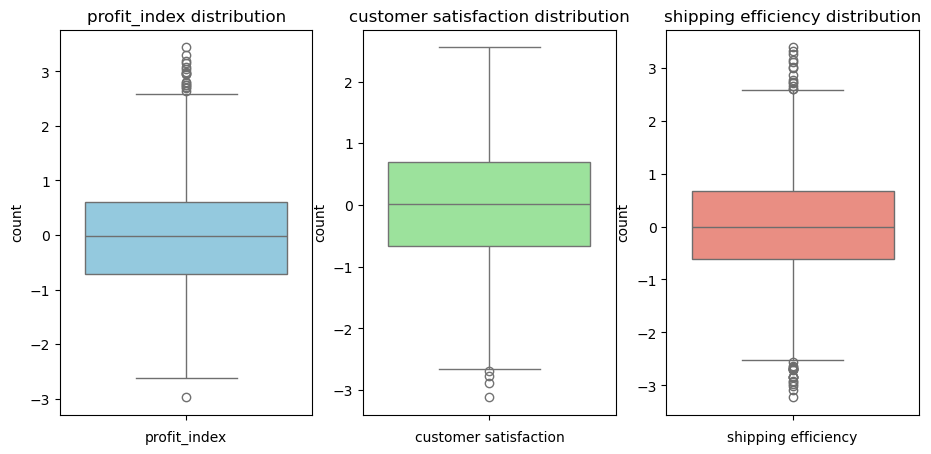

In [124]:
# checking outliers again
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(X_processed_df['profit_index'], color = 'skyblue')
plt.title('profit_index distribution')
plt.xlabel('profit_index')
plt.ylabel('count')

plt.subplot(1,4,2)
sns.boxplot(X_processed_df['customer_satisfaction'], color = 'lightgreen')
plt.title('customer satisfaction distribution')
plt.xlabel('customer satisfaction')
plt.ylabel('count')

plt.subplot(1,4,3)
sns.boxplot(X_processed_df['shipping_efficiency'], color = 'salmon')
plt.title('shipping efficiency distribution')
plt.xlabel('shipping efficiency')
plt.ylabel('count')



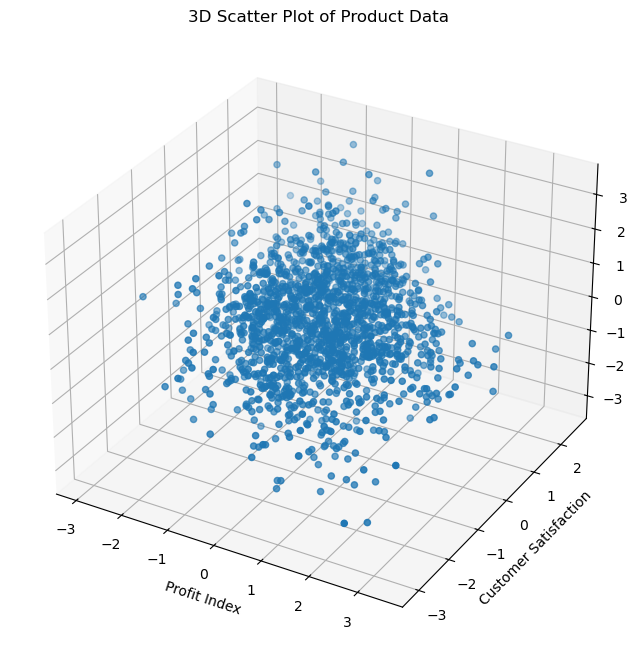

In [125]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection = '3d')
scatter = ax.scatter(X_processed_df['profit_index'],X_processed_df['customer_satisfaction'], 
                     X_processed_df['shipping_efficiency'])
ax.set_xlabel('Profit Index')
ax.set_ylabel('Customer Satisfaction')
ax.set_zlabel('shipping Efficiency')

ax.set_title('3D Scatter Plot of Product Data')
plt.show()

# Elbow and Silhouette Plot To Find Optimal Number of Clusters

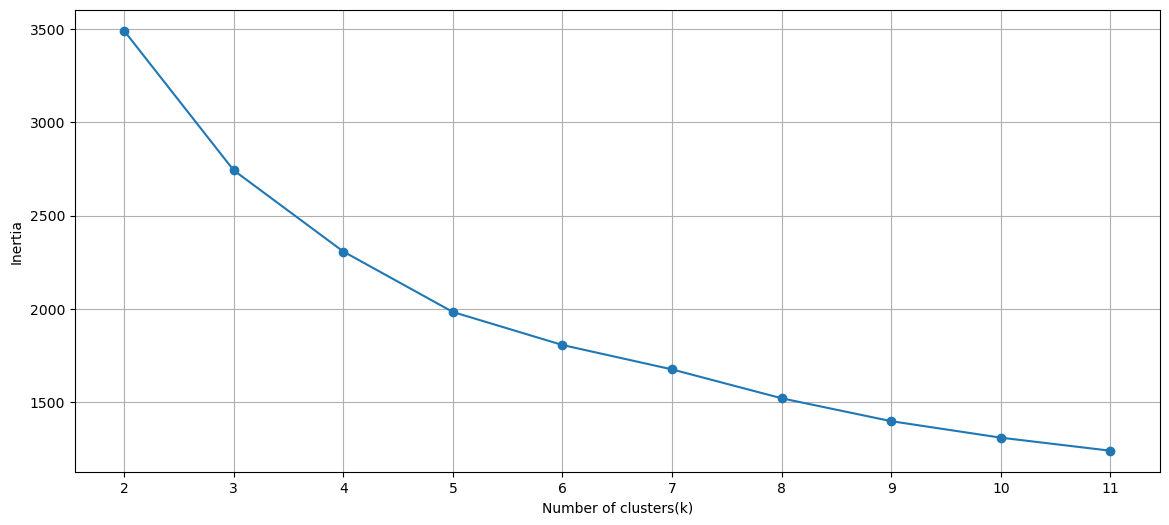

In [126]:
# better distribution now
# elbow method to find k value

max_k = 11
inertia = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42, max_iter = 1000)
    kmeans.fit_predict(X_processed_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))
plt.plot(k_values, inertia, marker = 'o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()
    

In [127]:
max_k = 11
silhoutte_score = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(X_processed_df)
    sil_score = silhouette_score(X_processed_df, cluster_labels)
    silhoutte_score.append(sil_score)


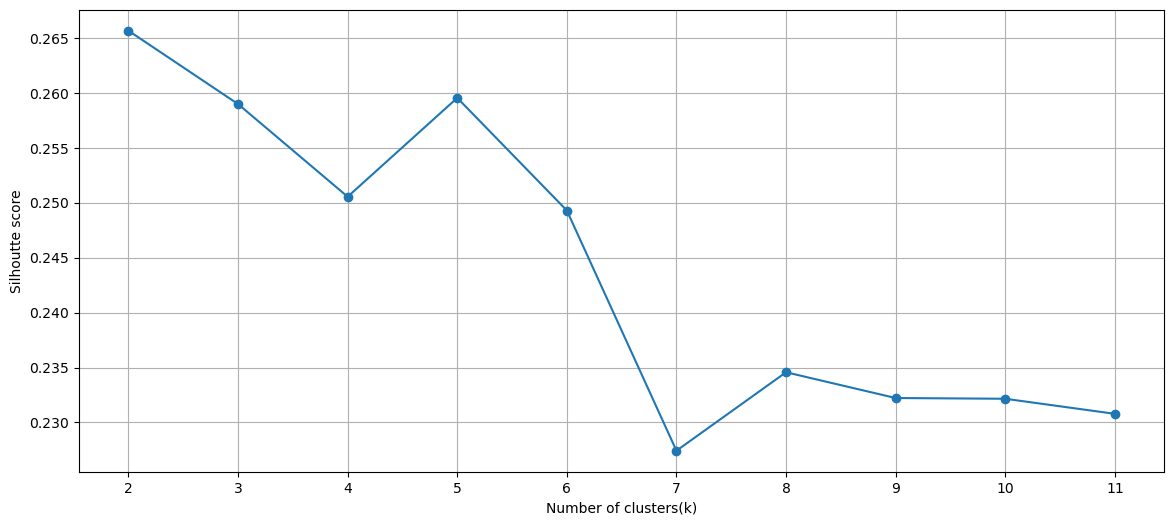

In [128]:
plt.figure(figsize = (14,6))
plt.plot(k_values, silhoutte_score, marker = 'o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhoutte score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

* It looks like the elbow is around 4 or 5 
* k=5 has a higher silhoutte score so I'm going with 5 clusters

# Fitting The Model and Plotting Clusters

In [135]:
# fitting the model

kmeans = KMeans(n_clusters= 5, random_state=42)
X_processed_df['cluster'] = kmeans.fit_predict(X_processed_df)



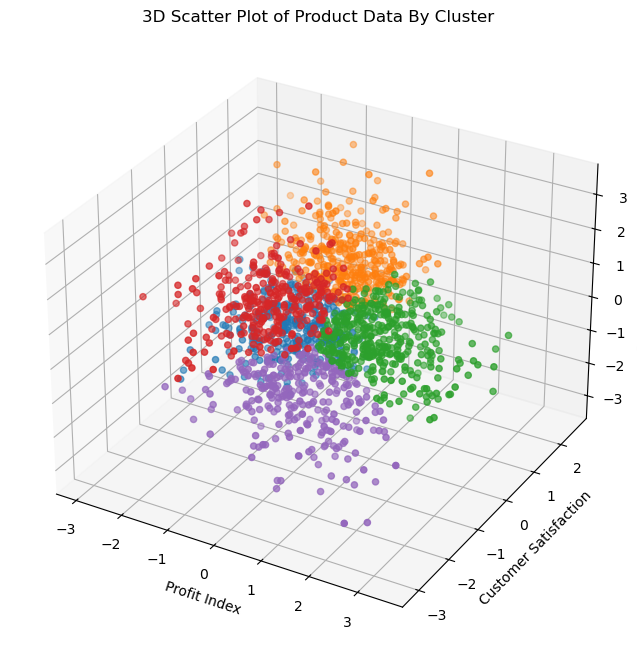

In [134]:
# plot the clusters

cluster_colors = {0:'#1f77b4', 
                  1: '#ff7f0e',
                  2: '#2ca02c',
                  3: '#d62728',
                  4: '#9467bd'}

colors = X_processed_df['cluster'].map(cluster_colors)
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection = '3d')
scatter = ax.scatter(X_processed_df['profit_index'],
                     X_processed_df['customer_satisfaction'], 
                     X_processed_df['shipping_efficiency'],
                    c=colors,
                    marker = 'o')
ax.set_xlabel('Profit Index')
ax.set_ylabel('Customer Satisfaction')
ax.set_zlabel('Shipping Efficiency')

ax.set_title('3D Scatter Plot of Product Data By Cluster')
plt.show()

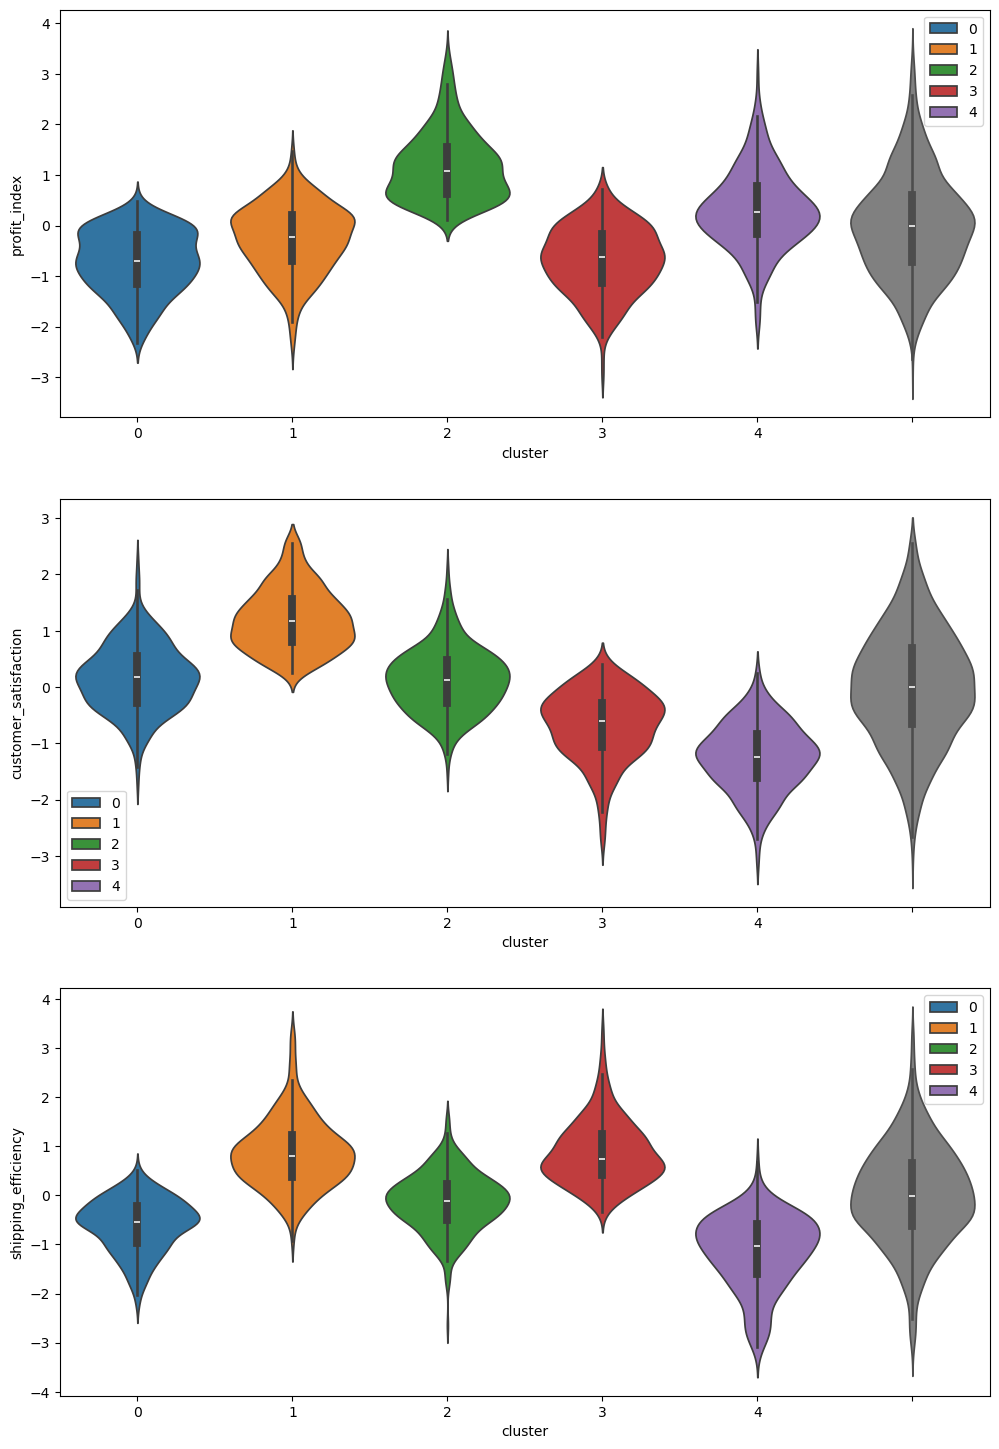

In [133]:
plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x=X_processed_df['cluster'], y=X_processed_df['profit_index'], palette = cluster_colors,
              hue = X_processed_df['cluster'])
sns.violinplot(y=X_processed_df['profit_index'], color = 'gray')

plt.subplot(3,1,2)
sns.violinplot(x=X_processed_df['cluster'], y=X_processed_df['customer_satisfaction'], palette = cluster_colors,
              hue = X_processed_df['cluster'])
sns.violinplot(y=X_processed_df['customer_satisfaction'], color = 'gray')

plt.subplot(3,1,3)
sns.violinplot(x=X_processed_df['cluster'], y=X_processed_df['shipping_efficiency'], palette = cluster_colors,
              hue = X_processed_df['cluster'])
sns.violinplot(y=X_processed_df['shipping_efficiency'], color = 'gray')

plt.show()


# Blue Cluster (0): Consistently Mediocre
* Average performance across all three metrics (profit, customer satisfaction, logitstics)
* Action: operational improvements (speed, accuracy) and customer experience initiative.
* Requires holistic upgrade- change in supplier or redesign and strategic rebranding

# Orange Cluster (1): Service Stars, Profit Laggards
* High satisfaction and efficiency but profit tails
* Action: Adjust pricing (optimize production process to reduce waste)
* Find ways to cut costs in production without compromising quality

# Green Cluster (2): Profit Hunters, Experience Neglecters
* High profits but average customers satisfaction and below average efficiency
* Action: Improve service quality and delivery reliability to prevent churn
* Implement post-purchase survey, actively record feedback, optimize shipping route
* Follow up email program or loyalty program to retain customers since these are high-profit items

# Red Cluster (3): Efficient But Low-Value
* High operational efficiency but below avg customer satisfaction and profits (low margin, high volume items)
* Action: reposition offerings to attract more demand
* Recommend higher-margin products (bundle and save promos); focus on just-in-time inventory 

# Purple Cluster (4): High Profits but Inefficent
* Moderate to high profits but low efficiency and customer satisfaction 
* Action: Supply chain and fulfillment optimization
* Premium shipping option and targeted customer care